In [2]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from scipy import sparse

Creat a meshgrid of $\mathbf{x}$ and $\mathbf{y}$ coordinates

In [13]:
N = 150
L = 20
X, Y = np.meshgrid(np.linspace(-L,L,N, dtype=float),
                   np.linspace(-L,L,N, dtype=float))

Our equation is,
    $$\left[-\frac{1}{2}(D \oplus D) + m\Delta x^2 V \right] \psi = \left(m \Delta x^2 E\right) \psi,$$
    where $D$ has -2 on the main diagonal and 1 on the two neighboring diagonals, $\psi$ is a vector. Firstly, we define our potential in units of $m \Delta x^2$; in other words `get_potential` actually returns $m\Delta x^2 V$

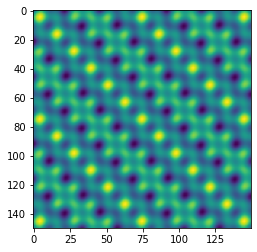

In [26]:
def get_potential(x, y):
    return 0.01*(np.cos(x)**2 + np.cos(x/2+y/2)**2 + np.cos(y)**2 + np.cos(x/3-y/3)**2)
# def get_potential(x, y):
#     return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))
V = get_potential(X,Y)
plt.imshow(V)
# fig = plt.figure(figsize=(9,9))
# ax = fig.add_subplot(projection='3d')
# ax.plot_surface(X, Y, V)

Now we construct
$$
-\frac{1}{2} D \oplus D+m \Delta x^{2} V
$$
Let $T=-\frac{1}{2} D \oplus D$ and $U=2 m \Delta x^{2} V$

In [27]:
diag = np.ones([N]) # vector of ones
diags = np.array([diag, -2*diag, diag]) # vector of vectors of the diagonals
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N) # creates the discretised 2nd derivative
T = -1/2 * sparse.kronsum(D,D) #N**2 x N**2 matrix
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

Get eigenvectors and eigenvalues

In [28]:
eigenvalues, eigenvectors = eigsh(H, k=1, which='SM')

In [29]:
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

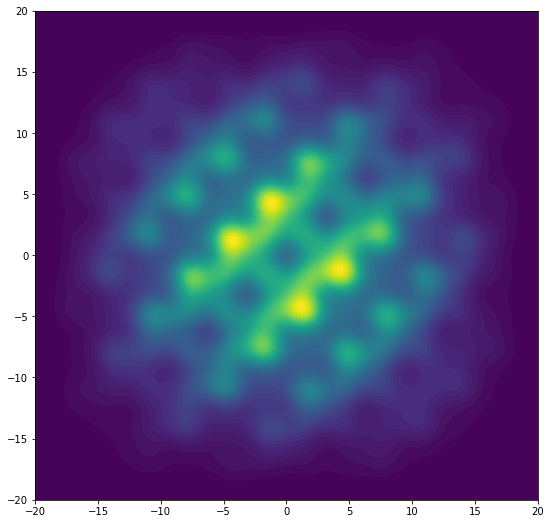

In [30]:
plt.figure(figsize=(9,9))
plt.contourf(X, Y, get_e(0)**2, 50)